<a href="https://colab.research.google.com/github/Ajay-user/ML-DL-RL-repo/blob/master/Regression/Lasso_and_Elastic_Net_for_Sparse_Signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

Estimates Lasso and Elastic-Net regression models on a manually generated sparse signal corrupted with an additive noise. Estimated coefficients are compared with the ground-truth.

In [2]:
# features
np.random.seed(42)

n_samples, n_features = 50, 100
# Return a sample (or samples) from the “standard normal” distribution.
X = np.random.randn(n_samples,n_features)

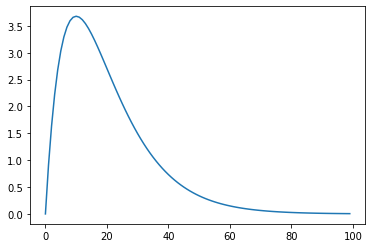

In [3]:
# coef
idx = np.arange(n_features)

plt.plot(idx * np.exp(-idx / 10));

In [4]:
coef = (-1) ** idx * np.exp(-idx / 10)

In [5]:
# Decreasing coef w.  
# alternated signs for visualization
coef>0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False])

In [6]:
## Sparsity
coef[10:] = 0

## Target  [n_samples, n_features] dot [n_features] = [n_samples]
y = np.dot(X, coef)

## Adding noise
y = y+0.01*np.random.random(n_samples)

In [7]:
## Split data in train set and test set

X_train, y_train = X[:n_samples//2], y[:n_samples//2]
X_test, y_test = X[n_samples//2:], y[n_samples//2:]

In [8]:
#  Model  LASSO

from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_preds_lasso = lasso.predict(X_test)

lasso_r2 = r2_score(y_test, y_preds_lasso)

In [9]:
#  Model Elastic Net

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio=0.7)
elastic_net.fit(X_train,y_train)
y_preds_elastic_net = elastic_net.predict(X_test)

elastic_net_r2 = r2_score(y_test, y_preds_elastic_net)

In [10]:
print(f'Lasso r2 score on test data :{lasso_r2}\nElasticNet r2 score on test data :{elastic_net_r2}')

Lasso r2 score on test data :0.6544465007898361
ElasticNet r2 score on test data :0.6397027724060502


## Plot

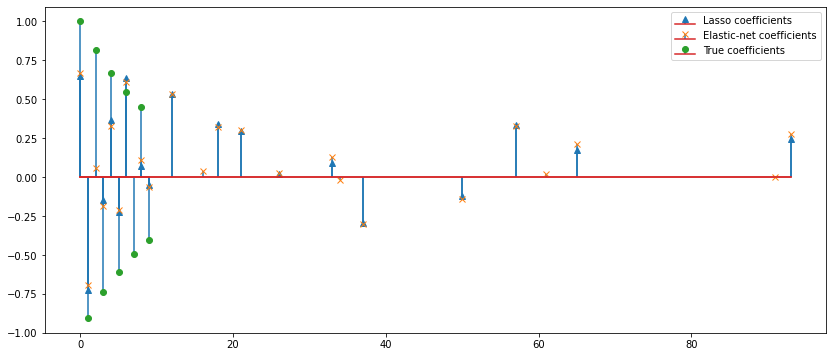

In [15]:
plt.figure(figsize=(14,6))
plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_!=0], markerfmt='^', label="Lasso coefficients", use_line_collection=True, )
plt.stem(np.where(elastic_net.coef_)[0], elastic_net.coef_[elastic_net.coef_!=0], markerfmt='x', label="Elastic-net coefficients", use_line_collection=True,)
plt.stem(np.where(coef)[0], coef[coef!=0], markerfmt='o', label="True coefficients", use_line_collection=True, )
plt.legend()